In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [6]:
# Load data trên lớp 23/2
data = np.array([[1,1.5,2],
              [2,2.5,4],
              [3,3.5,6],
              [4,4.5,8],
              [5,5.5,10],
              [6,6.5,12],
              [7,7.5,14]])

In [7]:
#Tach X1,X2 va y từ data
X = data[:,:2]
y = data[:,-1]
print(y)

[ 2.  4.  6.  8. 10. 12. 14.]


Text(0.5, 0, 'y')

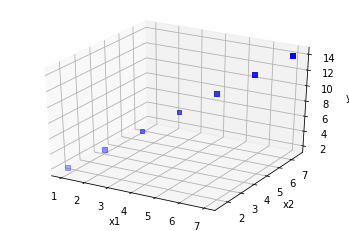

In [8]:
#plot
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c='b', marker='s')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

In [9]:
def normalized(X):
    for i in range(X.shape[1]):
        X[:,i]= (X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])
    return X

Text(0.5, 0, 'Y')

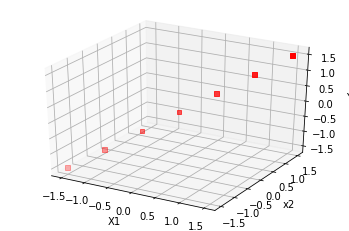

In [15]:
# #normalized data X
normalized_data = normalized(data)
normalized_X = normalized_data[:,:2]
normalized_y = normalized_data[:,-1]
#plot sau khi normalized
from mpl_toolkits.mplot3d import Axes3D
fig2 = plt.figure(1)
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(normalized_X[:,0], normalized_X[:,1], normalized_y, c='r', marker='s')
ax.set_xlabel('X1')
ax.set_ylabel('x2')
ax.set_zlabel('Y')

In [11]:
# # b). Implementing gradient descent

def h_multi(theta, X):
    res_h=theta[0]
    for i in range(len(X)):
        res_h+=theta[i+1]*X[i]
    return res_h

def grad0(X, y, theta):
    g=0
    m=y.size
    for i in range(m):
        g=g+(h_multi(theta,X[i])-y[i])
    return g/m

def grad_n(X,y, theta, num_col):
    g = 0
    m = y.size
    for i in range(m):
        g = g + (h_multi(theta,X[i]) - y[i])*X[i,num_col]
    return g/m

def cost(X, y, theta):
    J=0
    m=y.size
    for i in range(m):
        J=J + (h_multi(theta,X[i])-y[i])**2
    return J/(2*m)

def LinearRegressionMulti(X, y, theta, alpha, num_iters):
    cost_history =[cost(X, y, theta)]
    for i in range(num_iters):
        theta[0] -= alpha*grad0(X, y, theta) #Theta 0
        for j in range(X.shape[1]):
            theta[j+1] -= alpha *grad_n(X, y, theta,j) #theta 1 t n
        cost_history.append( cost(X, y, theta))
    return theta, cost_history

In [13]:
#Su dung ham LinearRegressionMulti
theta, cost_history = LinearRegressionMulti(normalized_X, normalized_y, [0,0,0] , 0.2,20)

Text(0, 0.5, 'Cost J')

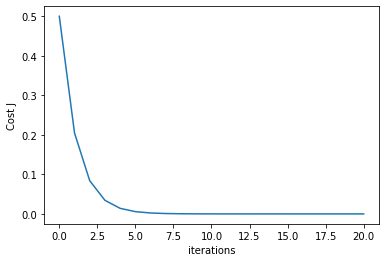

In [14]:
#So do bieu dien ham gradientDescent one variables
plt.figure(1)
plt.plot(cost_history)
plt.xlabel("iterations")
plt.ylabel("Cost J")

In [10]:
theta

[0.0, 0.5185363773992449, 0.4666827396593205]

Hội tụ khoảng lần thứ 19-20